### Identifying potential customers for loans

In [300]:
# Importing the libraries
import numpy as np #Use for linear algebra
import pandas as pd #Use for data processing
import matplotlib.pyplot as plt #Library for making the visualizations
import seaborn as sns #Library for making statistical graphics
from sklearn.model_selection import train_test_split #Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler #Use to standardize the data
from sklearn.linear_model import LogisticRegression #Use for logistic regression
from sklearn.neighbors import KNeighborsClassifier #Use for KNN classification
from sklearn.naive_bayes import GaussianNB #Use for NB model
from sklearn.metrics import confusion_matrix #For creating confusion matrix
from sklearn.metrics import accuracy_score #Use for calculating accuracy of a model
from sklearn.metrics import classification_report #Gives a actual score of a model 
from sklearn.metrics import roc_auc_score # Gives area under the curve score
from sklearn.metrics import roc_curve #Use for making ROC curve
from sklearn import metrics #Use to make matrix

In [287]:
# Importing the dataset
dataset = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [245]:
np.shape(dataset) # Give the size of the Dataset

(5000, 14)

In [246]:
dataset.dtypes # Provide the Data type

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [247]:
dataset.describe() # Give 5 point summary

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [248]:
dataset.isnull().apply(pd.value_counts) #Check for the null values

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [252]:
# Dropping/Ignoring ID and ZIP Code 
dataset = dataset.drop(['ID', 'ZIP Code'], axis=1)

# Also replacing the continuous variable with catagorical variable
dataset['Education'] = dataset['Education'].replace({1 : 'Undergraduate', 2 : 'Graduate', 3 : 'Advanced/Professional'})
dataset.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergraduate,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergraduate,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergraduate,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


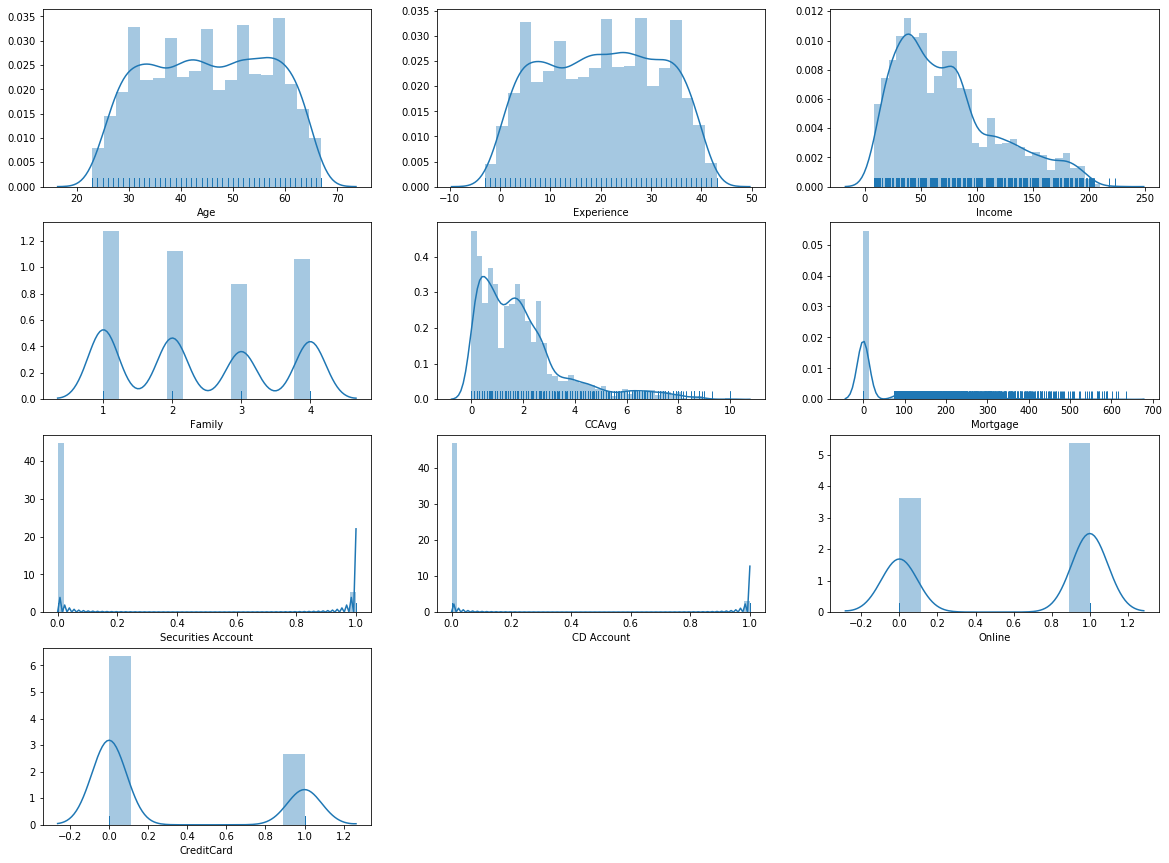

In [253]:
# Graph for the continuous variables distribution individually
plt.figure(figsize= (20,15))
plt.subplot(4,3,1)
sns.distplot(dataset['Age'],kde = True,rug = True) #Plot a ditribution graph

plt.subplot(4,3,2)
sns.distplot(dataset['Experience'],rug = True)

plt.subplot(4,3,3)
sns.distplot(dataset['Income'],rug = True)

plt.subplot(4,3,4)
sns.distplot(dataset['Family'],rug = True)

plt.subplot(4,3,5)
sns.distplot(dataset['CCAvg'],rug = True)

plt.subplot(4,3,6)
sns.distplot(dataset['Mortgage'],rug = True)

plt.subplot(4,3,7)
sns.distplot(dataset['Securities Account'],rug = True)

plt.subplot(4,3,8)
sns.distplot(dataset['CD Account'],rug = True)

plt.subplot(4,3,9)
sns.distplot(dataset['Online'],rug = True)

plt.subplot(4,3,10)
sns.distplot(dataset['CreditCard'],rug = True)

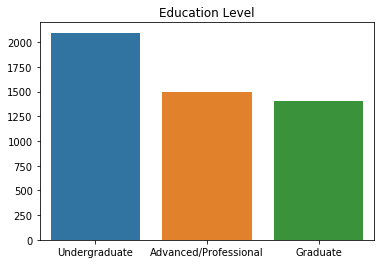

In [254]:
# Graph for the categorical variables distribution individually
plt.title('Education Level')
a = dataset['Education'].value_counts().index #Values for x-axis
b = [dataset['Education'].value_counts()[x] for x in a] # Count of each class on y-axis
sns.barplot(a,b) #Plot a bar graph

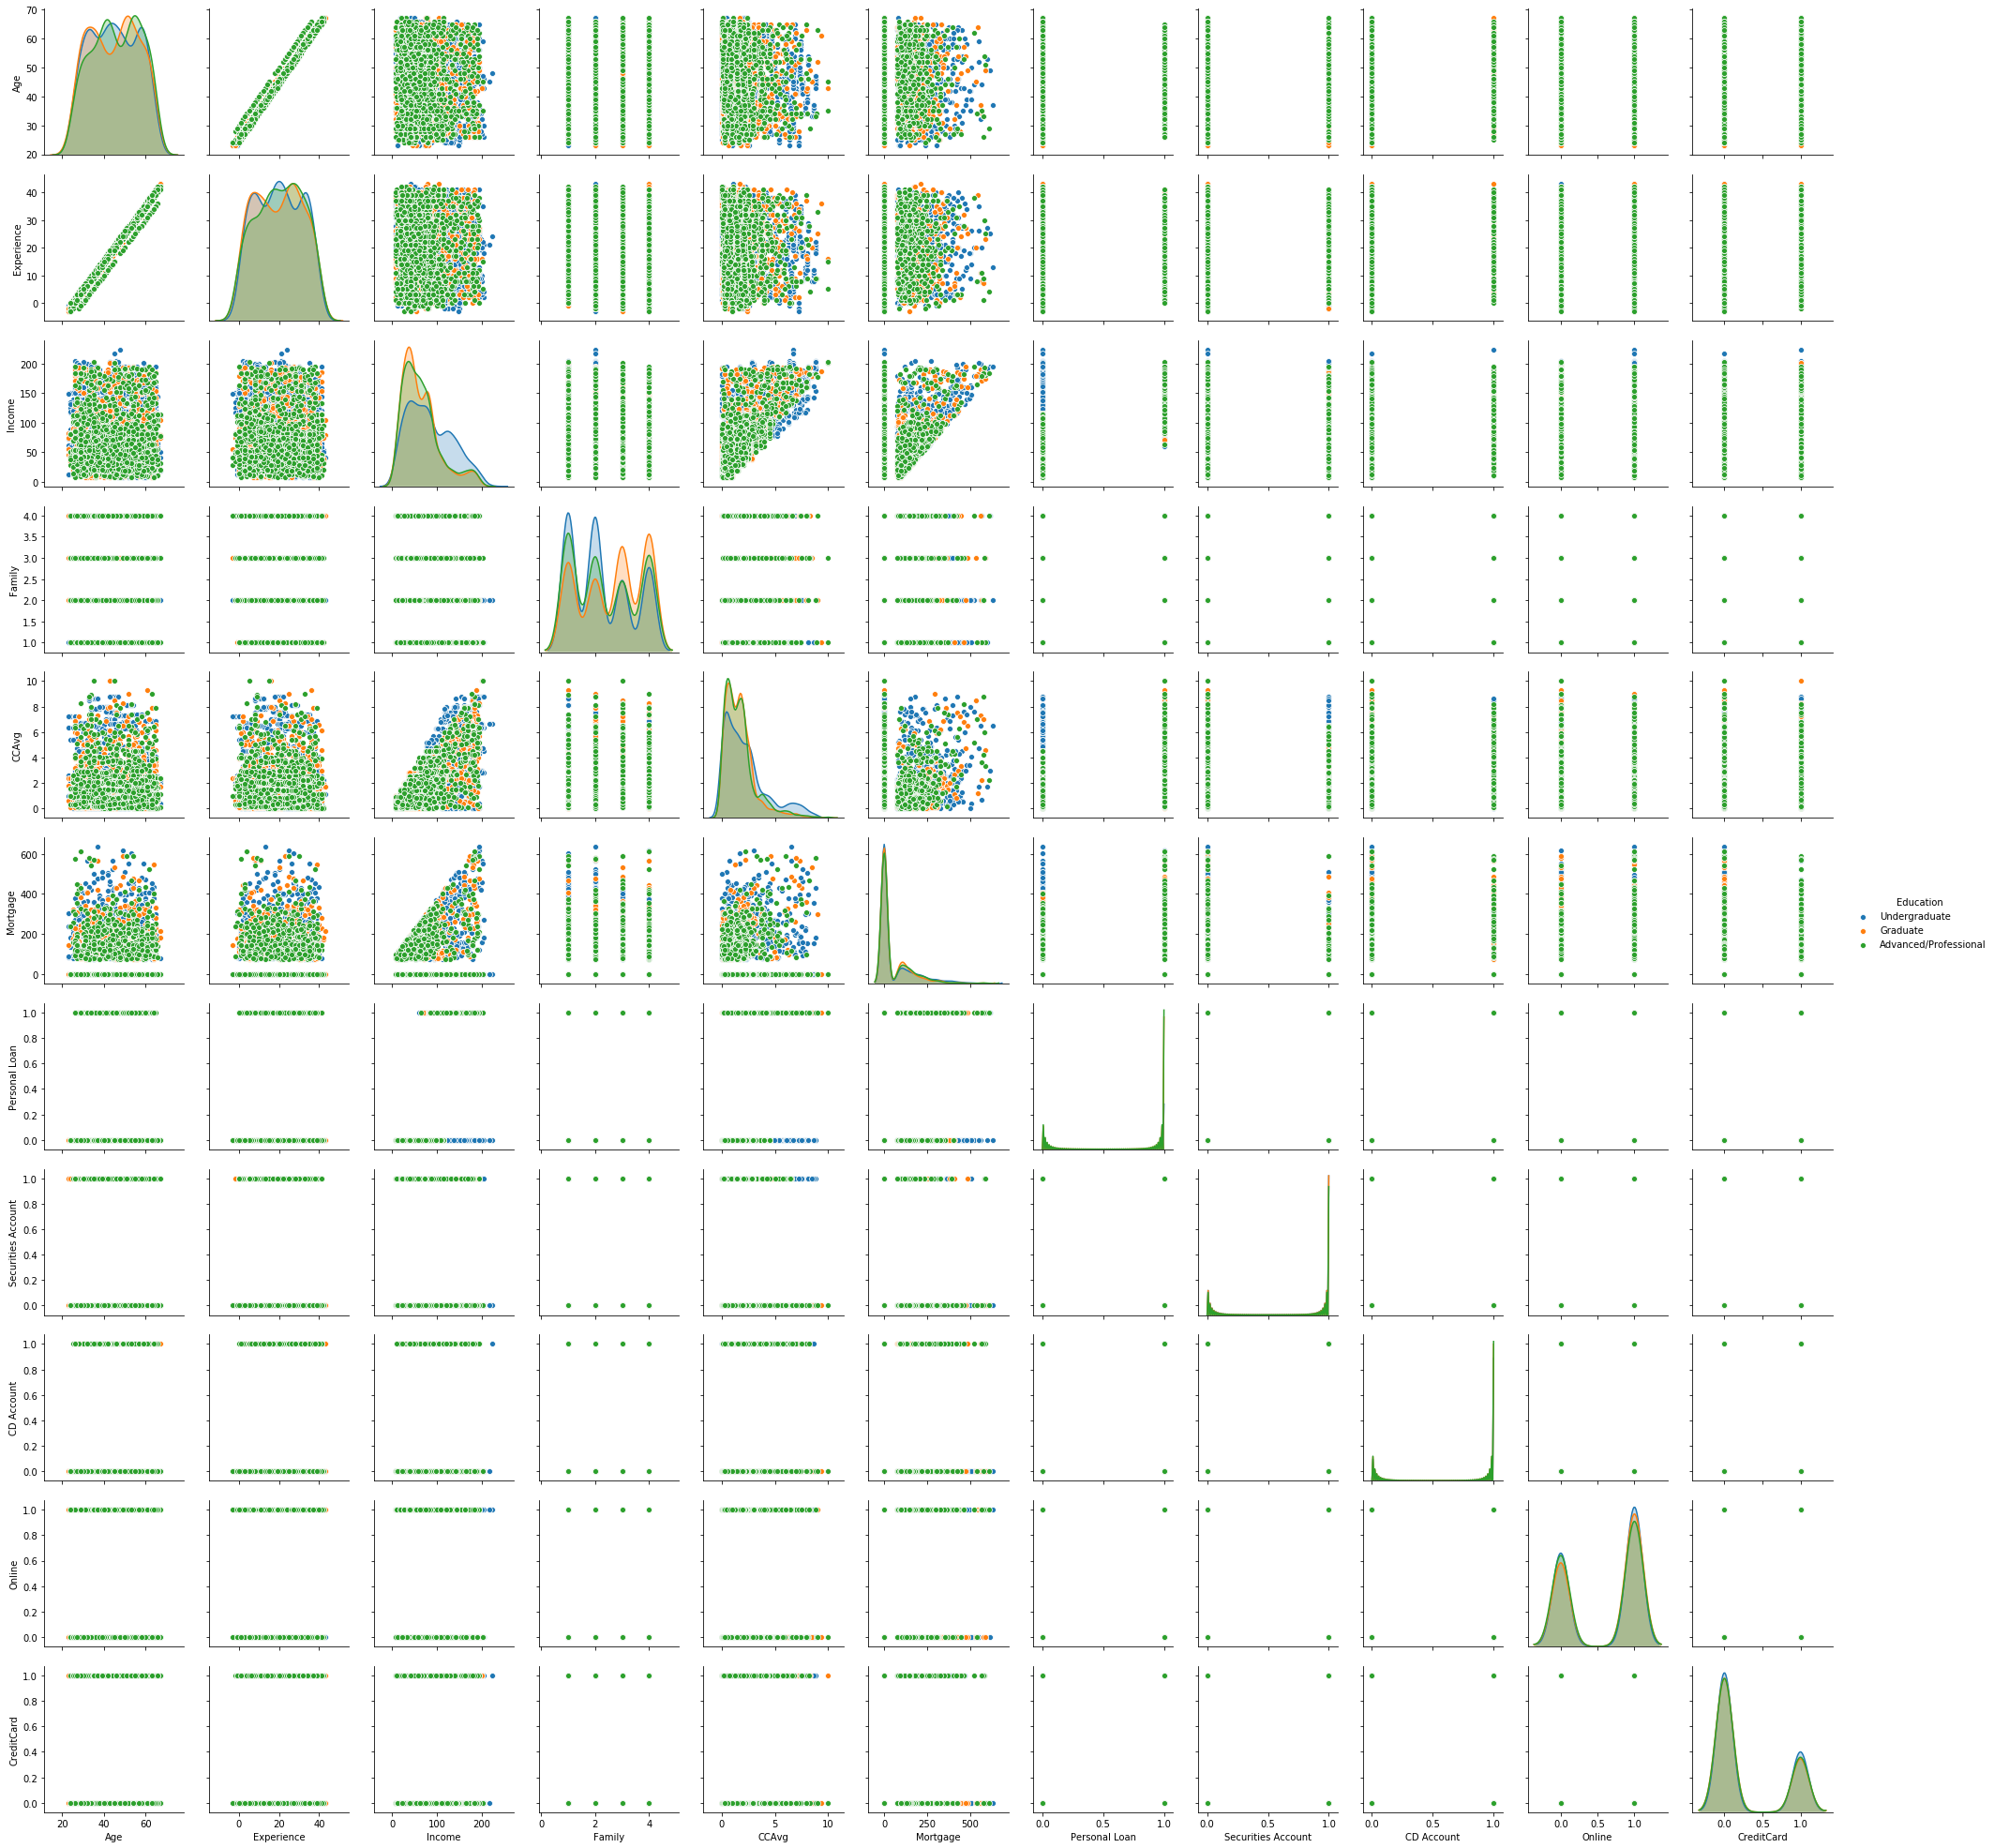

In [255]:
# Pair plot that includes all the columns of the data frame
sns.pairplot(dataset, hue = 'Education')

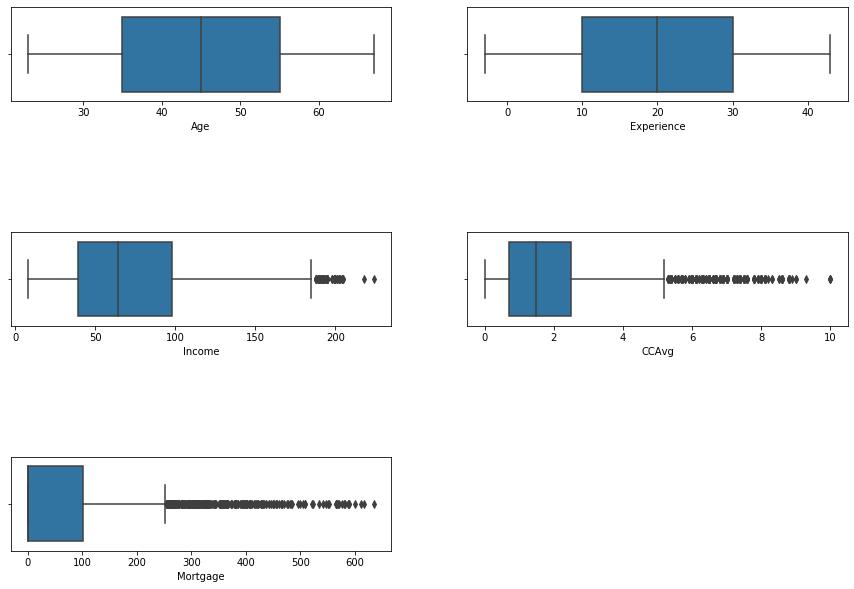

In [256]:
# To check for the outliers individually
plt.figure(figsize= (15,10))
plt.subplot(5,2,1)
sns.boxplot(dataset['Age']) #Plot a Box graph

plt.subplot(5,2,2)
sns.boxplot(dataset['Experience'])

plt.subplot(5,2,5)
sns.boxplot(dataset['Income'])

plt.subplot(5,2,6)
sns.boxplot(dataset['CCAvg'])

plt.subplot(5,2,9)
sns.boxplot(dataset['Mortgage'])

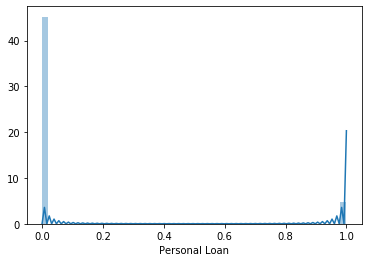

In [257]:
# Target Column Distribution
sns.distplot(dataset['Personal Loan'])

In [258]:
# Create Dummy Variables
dataset = pd.get_dummies(dataset, columns=['Education'])
dataset.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergraduate
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [262]:
# Variable Identification
X = dataset.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12]].values
y = dataset.iloc[:, 6].values

#Spliting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression Model

In [299]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, solver = 'lbfgs')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_LR = classifier.predict(X_test)
y_pred_prob_LR = classifier.predict_proba(X_test)[:,1]

coef_dataset = pd.DataFrame(classifier.coef_)
coef_dataset['intercept'] = classifier.intercept_

print(coef_dataset)

         0         1         2         3         4        5         6  \
0 -0.29511  0.355354  2.692484  0.617539  0.423569  0.10427 -0.235105   

          7         8         9        10        11  intercept  
0  0.908841 -0.422518 -0.437653  1.907156  1.901021  -4.991127  


In [290]:
# Model Performance
classifier_score_LR = classifier.score(X_test, y_test)

# Making the Confusion Matrix
LR_cm = confusion_matrix(y_test, y_pred_LR)

# Accuracy of the LR model
accuracy = accuracy_score(y_test,y_pred_LR)

# Classification Report
classreport_LR = classification_report(y_test,y_pred_LR)

print('Model Performance_LR :', classifier_score_LR)
print('The accuracy:', accuracy)
print('The Classification Report_LR:\n', classreport_LR)
print('The Confusion Matrix:\n', LR_cm)

Model Performance_LR : 0.9593333333333334
The accuracy: 0.9593333333333334
The Classification Report_LR:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.82      0.67      0.74       128

    accuracy                           0.96      1500
   macro avg       0.89      0.83      0.86      1500
weighted avg       0.96      0.96      0.96      1500

The Confusion Matrix:
 [[1353   19]
 [  42   86]]


In [265]:
# Calculating the False Positive Rate, True Positive Rate and Threshold of the LR model
fpr_LR, tpr_LR, thresholds_LR = metrics.roc_curve(y_test, y_pred_prob_LR , pos_label=1)

print("False Positive Rate", fpr_LR)
print("True Positive Rate", tpr_LR)
print("Threshold", thresholds_LR)

False Positive Rate [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.28862974e-04
 7.28862974e-04 1.45772595e-03 1.45772595e-03 2.91545190e-03
 2.91545190e-03 3.64431487e-03 3.64431487e-03 4.37317784e-03
 4.37317784e-03 5.10204082e-03 5.10204082e-03 5.83090379e-03
 5.83090379e-03 8.01749271e-03 8.01749271e-03 1.02040816e-02
 1.02040816e-02 1.23906706e-02 1.23906706e-02 1.38483965e-02
 1.38483965e-02 1.67638484e-02 1.67638484e-02 1.74927114e-02
 1.74927114e-02 2.18658892e-02 2.18658892e-02 2.62390671e-02
 2.62390671e-02 3.42565598e-02 3.42565598e-02 3.57142857e-02
 3.57142857e-02 3.86297376e-02 3.86297376e-02 4.15451895e-02
 4.15451895e-02 4.30029155e-02 4.30029155e-02 4.81049563e-02
 4.81049563e-02 4.95626822e-02 4.95626822e-02 5.39358601e-02
 5.39358601e-02 5.97667638e-02 5.97667638e-02 6.63265306e-02
 6.63265306e-02 7.21574344e-02 7.21574344e-02 7.36151603e-02
 7.36151603e-02 9.40233236e-02 9.40233236e-02 9.47521866e-02
 9.47521866e-02 9.83965015e-02 9.83965015e-02 1.13702624e-01
 1.1

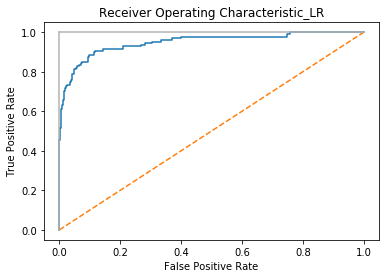

In [266]:
# Ploting the ROC curve of the LR model
plt.title('Receiver Operating Characteristic_LR')
plt.plot(fpr_LR, tpr_LR)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN Model

In [292]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_KNN = classifier.predict(X_test)
y_pred_prob_KNN = classifier.predict_proba(X_test)[:,1]

# Evaluate Performance of kNN Model
classifier_score_KNN = classifier.score(X_test, y_test)

# Making the Confusion Matrix
KNN_cm = confusion_matrix(y_test, y_pred_KNN)

# Accuracy of the LR model
accuracy_score(y_test,y_pred_KNN)

# Classification Report
classreport_KNN = classification_report(y_test,y_pred_KNN)

print('Model Performance_KNN :', classifier_score_KNN)
print('Accuracy :', accuracy)
print('The Classification Report_KNN:\n', classreport_KNN)
print('The Confusion Matrix:\n', KNN_cm)

Model Performance_KNN : 0.9653333333333334
Accuracy : 0.9593333333333334
The Classification Report_KNN:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1372
           1       0.95      0.62      0.75       128

    accuracy                           0.97      1500
   macro avg       0.96      0.81      0.87      1500
weighted avg       0.96      0.97      0.96      1500

The Confusion Matrix:
 [[1368    4]
 [  48   80]]


In [272]:
# Calculating the False Positive Rate, True Positive Rate and Threshold of the KNN model
fpr_KNN, tpr_KNN, thresholds_KNN = metrics.roc_curve(y_test, y_pred_prob_KNN , pos_label=1)

print("False Positive Rate", fpr_KNN)
print("True Positive Rate", tpr_KNN)
print("Threshold", thresholds_KNN)

False Positive Rate [0.         0.         0.         0.00291545 0.01457726 0.06049563
 1.        ]
True Positive Rate [0.       0.328125 0.46875  0.625    0.78125  0.890625 1.      ]
Threshold [2.  1.  0.8 0.6 0.4 0.2 0. ]


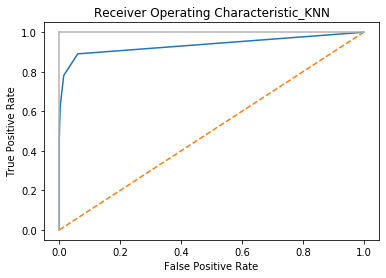

In [295]:
# Ploting the ROC curve for KNN model
plt.title('Receiver Operating Characteristic_KNN')
plt.plot(fpr_KNN, tpr_KNN)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive Bayes Classifier Model

In [293]:
# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_NB = classifier.predict(X_test)
y_pred_prob_NB = classifier.predict_proba(X_test)[:,1]

# Evaluate Performance of kNN Model
classifier_score_NB = classifier.score(X_test, y_test)

# Making the Confusion Matrix
NB_cm = confusion_matrix(y_test, y_pred_NB)

# Accuracy of the LR model
accuracy_score(y_test,y_pred_NB)

# Classification Report
classreport_NB = classification_report(y_test,y_pred_NB)

print('Model Performance_NB :', classifier_score_NB)
print('Accuracy :', accuracy)
print('The Classification Report_NB:\n', classreport_NB)
print('The Confusion Matrix:\n', NB_cm)

Model Performance_NB : 0.886
Accuracy : 0.9593333333333334
The Classification Report_NB:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      1372
           1       0.39      0.59      0.47       128

    accuracy                           0.89      1500
   macro avg       0.67      0.75      0.70      1500
weighted avg       0.91      0.89      0.90      1500

The Confusion Matrix:
 [[1254  118]
 [  53   75]]


In [275]:
# Calculating the False Positive Rate, True Positive Rate and Threshold of the NB model
fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve(y_test, y_pred_prob_NB , pos_label=1)

print("False Positive Rate", fpr_NB)
print("True Positive Rate", tpr_NB)
print("Threshold", thresholds_NB)

False Positive Rate [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.28862974e-04
 7.28862974e-04 1.45772595e-03 1.45772595e-03 2.18658892e-03
 2.18658892e-03 3.64431487e-03 3.64431487e-03 4.37317784e-03
 4.37317784e-03 5.10204082e-03 5.10204082e-03 5.83090379e-03
 5.83090379e-03 1.02040816e-02 1.02040816e-02 1.09329446e-02
 1.09329446e-02 1.23906706e-02 1.23906706e-02 1.45772595e-02
 1.45772595e-02 1.67638484e-02 1.67638484e-02 1.82215743e-02
 1.82215743e-02 1.89504373e-02 1.89504373e-02 2.11370262e-02
 2.11370262e-02 2.47813411e-02 2.47813411e-02 2.98833819e-02
 2.98833819e-02 3.13411079e-02 3.13411079e-02 3.49854227e-02
 3.49854227e-02 3.79008746e-02 3.79008746e-02 4.15451895e-02
 4.15451895e-02 4.30029155e-02 4.30029155e-02 4.51895044e-02
 4.51895044e-02 4.66472303e-02 4.66472303e-02 4.95626822e-02
 4.95626822e-02 5.46647230e-02 5.46647230e-02 5.68513120e-02
 5.68513120e-02 5.83090379e-02 5.83090379e-02 5.90379009e-02
 5.90379009e-02 6.41399417e-02 6.41399417e-02 6.63265306e-02
 6.6

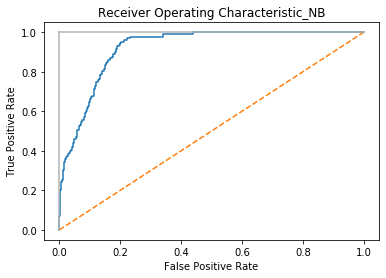

In [294]:
# Ploting the ROC curve for NB model
plt.title('Receiver Operating Characteristic_NB')
plt.plot(fpr_NB, tpr_NB)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Comparing the different Models

Model Performance_LR : 0.9593333333333334
Model Performance_KNN : 0.9653333333333334
Model Performance_NB : 0.886
The Confusion Matrix_LR:
 [[1353   19]
 [  42   86]]
The Confusion Matrix_KNN:
 [[1368    4]
 [  48   80]]
The Confusion Matrix_NB:
 [[1254  118]
 [  53   75]]


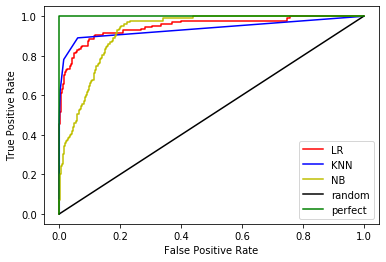

In [298]:
# Model Performance of all the three models
print('Model Performance_LR :', classifier_score_LR)
print('Model Performance_KNN :', classifier_score_KNN)
print('Model Performance_NB :', classifier_score_NB)

# Confusion matrix of all the three models
print('The Confusion Matrix_LR:\n', LR_cm)
print('The Confusion Matrix_KNN:\n', KNN_cm)
print('The Confusion Matrix_NB:\n', NB_cm)

#ROC curve of all the three models
plt.plot(fpr_LR, tpr_LR,'r-',label = 'LR')
plt.plot(fpr_KNN,tpr_KNN,'b-', label= 'KNN')
plt.plot(fpr_NB,tpr_NB,'y-', label= 'NB')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Conclusion

From the Model Performane and the visualization above, it is cleared that the Supervised model using KNN 
gives us the best results, which is expected because it gives us less numbers of false positve and false 
negative cases. Some of the models have high recall but low precision, which indicates these models have 
tendency to make more wrong predictions or false positives.